In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import os
doc = [ "Trump proposes to build a wall in border between USA and Mexico to stop illegal immigration.",
"Trump administration reduces H1B quota for Indian software companies",
"BJP says building Ram temple is a matter of faith",
"India deports seven Rohingya refugees back to Myanmar",
"Germany accepts 10000 Syrian refugees but France has reservations due to terrorism",
"Indian software companies hire less engineers due to Trump effect",
"Software engineers look forward to Canada as destination as US reduces H1B quota",
 "Belgium says “refugees not welcome” due to terrorist incidents" ]

terms = ['Trump','H1B','refugees','immigration','Software','hire','Temple']
doc = [i.lower() for i in doc]
doc



['trump proposes to build a wall in border between usa and mexico to stop illegal immigration.',
 'trump administration reduces h1b quota for indian software companies',
 'bjp says building ram temple is a matter of faith',
 'india deports seven rohingya refugees back to myanmar',
 'germany accepts 10000 syrian refugees but france has reservations due to terrorism',
 'indian software companies hire less engineers due to trump effect',
 'software engineers look forward to canada as destination as us reduces h1b quota',
 'belgium says “refugees not welcome” due to terrorist incidents']

In [9]:
def create_matrix(terms,doc):
    mat = np.zeros([len(terms),len(doc)])

    for cnt,i in enumerate(terms):
        for id,j in enumerate(doc):
            if i in j:
                mat[cnt][id] = 1

    mat = mat.transpose()
    return mat

mat1 = create_matrix(terms,doc)
mat1

array([[0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.]])

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Create the Document Term Matrix
count_vectorizer = CountVectorizer(stop_words='english')
count_vectorizer = CountVectorizer()
sparse_matrix = count_vectorizer.fit_transform(doc)

# OPTIONAL: Convert Sparse Matrix to Pandas Dataframe if you want to see the word frequencies.
doc_term_matrix = sparse_matrix.todense()
df = pd.DataFrame(doc_term_matrix, 
                  columns=count_vectorizer.get_feature_names(), 
                  index=['doc1', 'doc2', 'doc3', 'doc4', 'doc5', 'doc6','doc7', 'doc8']
                 )
df

,10000,accepts,administration,and,as,back,belgium,between,bjp,border,...,syrian,temple,terrorism,terrorist,to,trump,us,usa,wall,welcome
doc1,0,0,0,1,0,0,0,1,0,1,...,0,0,0,0,2,1,0,1,1,0
doc2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
doc3,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
doc4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
doc5,1,1,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0,0
doc6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
doc7,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
doc8,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,1


In [15]:
from sklearn.metrics.pairwise import cosine_similarity
print(cosine_similarity(df, df))

[[1.         0.08084521 0.         0.17149859 0.14002801 0.2300895
  0.12524486 0.16169042]
 [0.08084521 1.         0.         0.         0.         0.42163702
  0.34426519 0.        ]
 [0.         0.         1.         0.         0.         0.
  0.         0.11111111]
 [0.17149859 0.         0.         1.         0.20412415 0.1118034
  0.09128709 0.23570226]
 [0.14002801 0.         0.         0.20412415 1.         0.18257419
  0.0745356  0.28867513]
 [0.2300895  0.42163702 0.         0.1118034  0.18257419 1.
  0.24494897 0.21081851]
 [0.12524486 0.34426519 0.         0.09128709 0.0745356  0.24494897
  1.         0.0860663 ]
 [0.16169042 0.         0.11111111 0.23570226 0.28867513 0.21081851
  0.0860663  1.        ]]


In [17]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from scipy.cluster import  hierarchy

#Vectorizing
X = CountVectorizer().fit_transform(doc)
X = TfidfTransformer().fit_transform(X)
#Clustering
X = X.todense()
threshold = 0.1
Z = hierarchy.linkage(X,"average", metric="cosine")
C = hierarchy.fcluster(Z, threshold, criterion="distance")

In [24]:
Z

array([[ 1.        ,  5.        ,  0.63635067,  2.        ],
       [ 6.        ,  8.        ,  0.77621867,  3.        ],
       [ 4.        ,  7.        ,  0.84735079,  2.        ],
       [ 3.        , 10.        ,  0.89761169,  3.        ],
       [ 0.        ,  9.        ,  0.93350629,  4.        ],
       [11.        , 12.        ,  0.96163188,  7.        ],
       [ 2.        , 13.        ,  0.98714234,  8.        ]])

In [25]:
C

array([7, 4, 8, 3, 1, 5, 6, 2], dtype=int32)

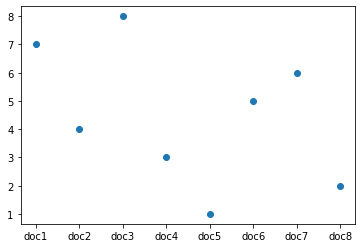

In [32]:
plt.scatter(df.index,C)